# Atividade 3

## Redes neurais simples

Na pasta **NNFS** ilustramos o funcionamento básico de uma rede neural e a utilizamos para fazer um treinamento ilustrativo onde a rede neural simplesmente aprendeu a interpolar uma função seno no intervalo de 0 a 2π. Vimos que qualquer tentativa de extrapolação falha.

Em todos os casos, use MSE para a fução de perda (loss), otimizador Adam e funções de ativação `tanh`. Varie o número de camadas ocultas e neurônios por camada para ver como afetam o resultado. 

Há muitos outros parâmetros que podem ser ajustados, como a taxa de aprendizado, número de épocas, batch size, número de pontos. Procure entender o que são estes parâmetros e como afetam os resultados.

Anote tudo que aprender na forma de um relatório informal, mas organizado. Pode ser um arquivo markdown ou um jupyter notebook que serão salvos no seu github. 

### Instruções básicas

Eu vou enviar por email um exemplo de implementação em scikit-learn para vocês explorarem. Façam o mesmo com PyTorch ou TensorFlow.

Treinem a rede neural para interpolar algumas funções e procurem entender como o número de camadas e neurônios afetam o resultado. Lembrem-se que excesso de parâmetros pode levar a overfitting.

Funções de teste para treinar:

- seno, cosseno, tangente no intervalo de 0 a 2π
- função sync(x) = sin(x)/x no intervalo de -10 a 10
- função gaussiana no intervalo de -10 a 10

### Treinar derivadas

Vamos tentar ensinar a rede neural a calcular derivadas numéricas. Para isso, vamos definir um domínio comum de 0 a 2π a fim de depois testar com funções trigonométricas.

Use como input N pontos gerados por polinômios, e como output a sua derivada. Varie a potência p de 0 a 10 ao longo do treinamento.

```python
x = np.random.random(0, 2*np.pi)
x_input  = x ** p
x_output = p * x ** (p-1)
```

Finalizado o treinamento, faça um teste (predict) usando uma função trigonométrica como input e verifique se o output retorna sua derivada!

c:\Users\pf010\AppData\Local\miniconda3\envs\tensorflow-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


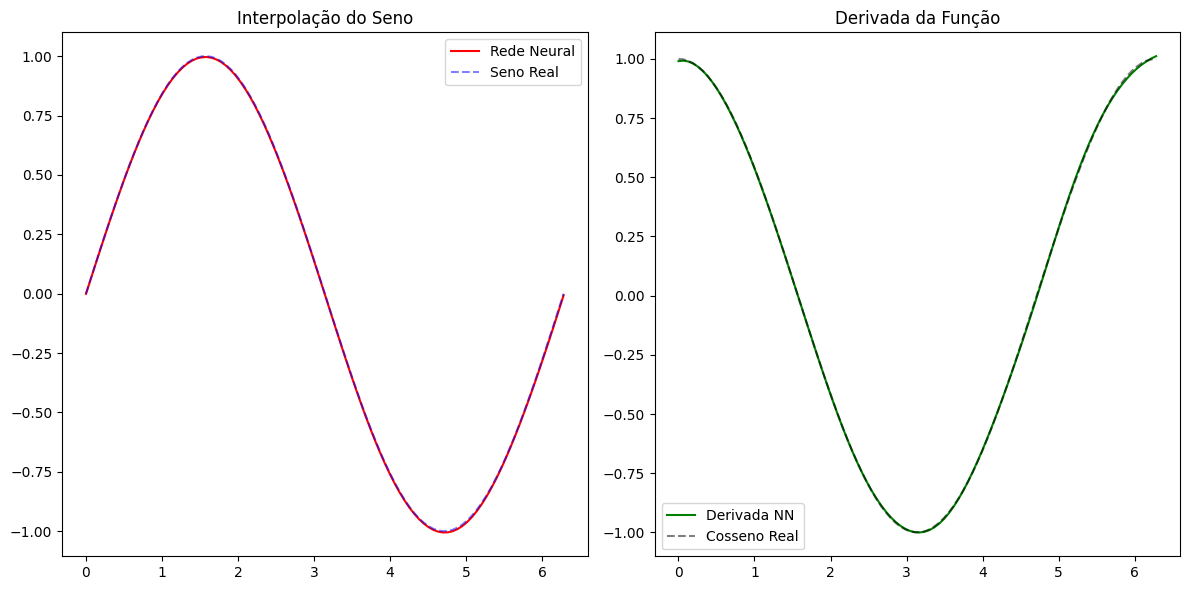

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.api.models import Sequential
from keras.api.layers import Dense

# Gerando os dados de treinamento
# Valores de x vão de 0 a 2*pi, com 1000 pontos
# Inicialmente, x_train é um vetor. Usando reshape(-1, 1) estou transformando em uma matriz coluna de 1000 linhas e 1 coluna.
x_train = np.linspace(0, 2*np.pi, 1000).reshape(-1, 1)
y_train = np.sin(x_train)

# Gerando os dados de teste
# Valores de x vão de 0 a 2*pi, com 200 pontos
# Valores de teste é formado por uma matriz coluna de 200 linhas e 1 coluna.
x_test = np.linspace(0, 2*np.pi, 200).reshape(-1, 1)

# Criando o modelo de rede neural
# Estou usando uma rede neural com 2 camadas ocultas e uma camada de saída.
# As primeiras camadas têm 10 neurônios cada e ambas usam a função de ativação tanh.
# A camada de saída tem 1 neurônio e não usa função de ativação (saída linear).
# O input_shape=(2,) indica que a entrada da rede neural terá duas dimensões.
model = Sequential([
    Dense(10, activation='tanh', input_shape=(2,)),  # Camada oculta 1
    Dense(10, activation='tanh'),                   # Camada oculta 2
    Dense(1)                                       # Saída linear
])

# O compile está configurando o modelo para usar o otimizador adam e a função de perda MSE.
# O otimizador adam é um algoritmo de otimização que ajusta os pesos da rede neural durante o treinamento.
model.compile(optimizer='adam', loss='mse')

# Aqui estou aplicando o modelo nos dados criados anteriormente
# 'epochs' determina o número de iterações (vezes que o código passa pelos dados)
# 'batch_size' o modelo atualiza os pesos a cada valor atrivuído a este parâmetro
# A cada epoch o modelo ajusta os pesos:
# Para cada neurônio na camada oculta há 1 peso (w) e 1 bias (b) (nas duas primeiras camadas ocultas tenho 10 w e 10 b para cada camada).
# 1: o modelo calcula y_pred; 2: calcula o mse; 3: o GD calcula como cada peso contribuiu para o mse e por fim, atualiza os pesos
# 'verbose=0' indica a barra de progresso
history = model.fit(x_train, y_train, epochs=500, batch_size=32, verbose=0)

# Cálculo da derivada
# Tensorflow atua apenas com tensores, por isso o 'convert_to_tensor'
# 'dtype=tf.float32' garante precisão numérica
# 'GradientTape' funciona como um gravador dos cálculos das derivadas
# 'tape.watch()' funciona com um indicador para gravar os cálculos das derivador de x_tensor
# 'gradient' calcula as derivadas de y_pred em relação a x_tensor (?????)
def compute_derivative(model, x):
    x_tensor = tf.convert_to_tensor(x, dtype=tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(x_tensor)
        y_pred = model(x_tensor)
    dy_dx = tape.gradient(y_pred, x_tensor)
    return dy_dx.numpy()

# Calcular derivada nos pontos de teste
derivatives = compute_derivative(model, x_test)

# Derivada analítica (cos(x))
true_derivatives = np.cos(x_test)


predictions = model.predict(x_test)

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(x_test, predictions, 'r-', label='Rede Neural')
plt.plot(x_test, np.sin(x_test), 'b--', label='Seno Real', alpha=0.5)
plt.title('Interpolação do Seno')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(x_test, derivatives, 'g-', label='Derivada NN')
plt.plot(x_test, true_derivatives, 'k--', label='Cosseno Real', alpha=0.5)
plt.title('Derivada da Função')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

layers = 3
neurons = 5
seed = 42
max_epochs = 100000

# Gerar dados de treinamento (x e y = sin(x))
x_train = np.linspace(0, 2 * np.pi, 1000)
y_train = np.sin(x_train)

# Criar o modelo
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))  # Primeira camada oculta
model.add(Dense(64, activation='relu'))  # Segunda camada oculta
model.add(Dense(1, activation='linear'))  # Saída linear (previsão do seno)

# Compilar o modelo
model.compile(optimizer='adam', loss='mse')

# Treinar o modelo
model.fit(x_train, y_train, epochs=100, batch_size=32)

# Fazer previsões
x_test = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y_pred = model.predict(x_test)

# Plotar resultados
plt.plot(x_test, np.sin(x_test), label='Seno Real', color='blue')
plt.plot(x_test, y_pred, label='Predição da Rede Neural', color='red', linestyle='dashed')
plt.legend()
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
np.random.seed(42)

def generate_data(qtde):
    x = np.linspace(-1, 1, 1000).reshape(-1, 1)
    y = []
    dy = []
    
    for _ in range(qtde // 2):  # Metade dos polinômios será de grau 4
        p = 4  # Grau fixo
        coeffs = np.random.randn(p + 1)
        polinomio = np.polyval(coeffs, x)
        y.append(polinomio)
        dy.append(np.polyval(np.polyder(coeffs), x) / np.max(np.abs(polinomio)))
    
    for _ in range(qtde // 2):  # Metade dos polinômios será de grau 3
        p = 3  # Grau fixo
        coeffs = np.random.randn(p + 1)
        polinomio = np.polyval(coeffs, x)
        y.append(polinomio)
        dy.append(np.polyval(np.polyder(coeffs), x) / np.max(np.abs(polinomio)))

    # Empilhar dados
    y = np.hstack(y).T
    dy = np.hstack(dy).T
    return y, dy

# gerar dados
y, dy = generate_data(10000)

print(y.shape)
print(dy.shape)

(10000, 1000)
(10000, 1000)


In [30]:
def generate_polynomial_with_roots_and_degree(x, degree, num_polynomials):
    y = []
    dy = []
    
    for _ in range(num_polynomials):
        # Gerar raízes aleatórias no intervalo [-1, 1]
        roots = np.random.uniform(-1, 1, degree)
        # Construir o polinômio a partir das raízes
        coeffs = np.poly(roots)  # np.poly gera os coeficientes do polinômio
        # Avaliar o polinômio e sua derivada nos pontos x
        polinomio = np.polyval(coeffs, x)
        derivada = np.polyval(np.polyder(coeffs), x)
        # Adicionar aos resultados
        y.append(polinomio)
        dy.append(derivada / np.max(np.abs(polinomio)))  # Normalizar a derivada
    
    # Empilhar os resultados
    y = np.hstack(y).T
    dy = np.hstack(dy).T
    return y, dy

# Exemplo de uso
x = np.linspace(-1, 1, 500).reshape(-1, 1)  # Pontos de avaliação
num_polynomials = 5000  # Número total de polinômios

# Gerar polinômios de grau 4
y_degree_4, dy_degree_4 = generate_polynomial_with_roots_and_degree(x, degree=4, num_polynomials=num_polynomials // 2)

# Gerar polinômios de grau 3
y_degree_3, dy_degree_3 = generate_polynomial_with_roots_and_degree(x, degree=3, num_polynomials=num_polynomials // 2)

# Combinar os resultados
y = np.vstack((y_degree_4, y_degree_3))
dy = np.vstack((dy_degree_4, dy_degree_3))

print(y.shape)
print(dy.shape)

(5000, 500)
(5000, 500)


In [31]:
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

In [32]:
# separa os os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(y, dy, test_size=0.2, random_state=42)

neurons = 20  # Aumentar o número de neurônios
layers = 5    # Reduzir o número de camadas para evitar overfitting

# define modelo
model = MLPRegressor(
    hidden_layer_sizes=tuple([neurons] * layers), 
    activation='tanh',
    solver='adam',
    max_iter=10000, 
    random_state=42,
    learning_rate='adaptive',
    learning_rate_init = 0.001,
    n_iter_no_change = 50,
    tol = 1e-8,
    verbose=True)

# treinamento
model.fit(X_train, y_train)

# teste
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R²: {r2}")

Iteration 1, loss = 0.89142388
Iteration 2, loss = 0.75962479
Iteration 3, loss = 0.60166290
Iteration 4, loss = 0.46693329
Iteration 5, loss = 0.37376771
Iteration 6, loss = 0.31351191
Iteration 7, loss = 0.27142609
Iteration 8, loss = 0.23795927
Iteration 9, loss = 0.20965637
Iteration 10, loss = 0.18500430
Iteration 11, loss = 0.16304565
Iteration 12, loss = 0.14448244
Iteration 13, loss = 0.12781705
Iteration 14, loss = 0.11377424
Iteration 15, loss = 0.10182987
Iteration 16, loss = 0.09171887
Iteration 17, loss = 0.08302076
Iteration 18, loss = 0.07538779
Iteration 19, loss = 0.06871278
Iteration 20, loss = 0.06294864
Iteration 21, loss = 0.05778786
Iteration 22, loss = 0.05329602
Iteration 23, loss = 0.04936057
Iteration 24, loss = 0.04586153
Iteration 25, loss = 0.04263547
Iteration 26, loss = 0.03980431
Iteration 27, loss = 0.03732291
Iteration 28, loss = 0.03513984
Iteration 29, loss = 0.03304054
Iteration 30, loss = 0.03115246
Iteration 31, loss = 0.02958588
Iteration 32, los

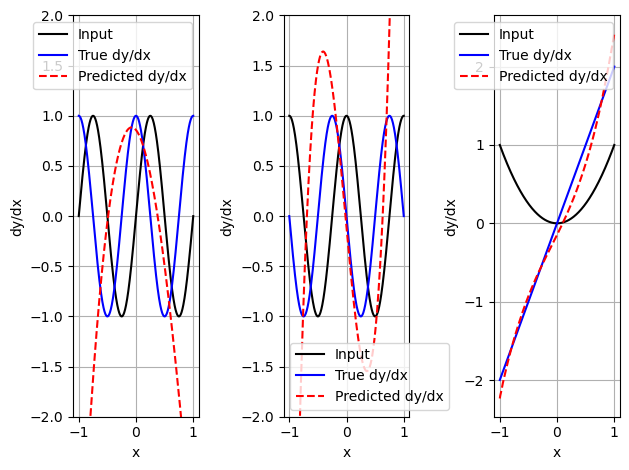

In [33]:
# Ajustar o formato de new_y para ter 500 features
new_x = np.linspace(-1, 1, y.shape[1]).reshape(-1, 1)  # new_x com 500 pontos
new_y = np.sin(2 * np.pi * new_x).T  # Transpor para ter 500 features
new_dy = np.cos(2 * np.pi * new_x).T  # Transpor para ter 500 features

# Teste 1
plt.subplot(131)
predicted_derivative = model.predict(new_y)

plt.plot(new_x, new_y[0], label='Input', color='black')
plt.plot(new_x, new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x, predicted_derivative[0], label='Predicted dy/dx', color='red', linestyle='dashed')
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)

# Teste 2
plt.subplot(132)
new_y = np.cos(2 * np.pi * new_x).T
new_dy = -np.sin(2 * np.pi * new_x).T
predicted_derivative = model.predict(new_y)

plt.plot(new_x, new_y[0], label='Input', color='black')
plt.plot(new_x, new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x, predicted_derivative[0], label='Predicted dy/dx', color='red', linestyle='dashed')
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)

# Teste 3
plt.subplot(133)
new_y = (new_x ** 2).T
new_dy = (2 * new_x).T
predicted_derivative = model.predict(new_y)

plt.plot(new_x, new_y[0], label='Input', color='black')
plt.plot(new_x, new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x, predicted_derivative[0], label='Predicted dy/dx', color='red', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()